# Deep Learning für Visual Computing: Übungsblatt 04


**Von: Maximilian Mundt, Radmehr Nouri Inanlou**

**Abgabe: 11.05.2022**

## Importe

In [1]:
import torch

from torch.utils.data import DataLoader
from visualize import show_synthetic_data, show_loss_curve, show_decision_boundary
from handout import CircelsDataset, BinaryClassifierMLP, evaluate, train_binary

## a) Dataset und Dataloader

Vervollständigen Sie die Klasse ``CirclesDataset`` in ``handout.py`` die das Interface eines
map-style dataset implementiert.

*siehe handout.py*

Erstellen Sie ein ``CirclesDataset`` Instanz mit 10000 Elementen und verwenden Sie die
``DataLoader`` Klasse, um über den Datensatz in Batches der Größe 64 zu iterieren. Fügen
Sie die Batches wieder zum vollständigen Datensatz zusammen

In [2]:
dataset = CircelsDataset()
dataloader = DataLoader(dataset, batch_size=64)

for points, labels in dataloader:
    pass

*Keine Ahnung, was mit dem Zusammenfügen gemeint ist. Spielt ja im Endeffekt keine Rolle, da wir sowieso später die Instanz von ``CircleDataset`` nutzen. Oder war hier nur wichtig, wie man über den Dataloader iteriert? Für den Fall haben wir noch aufgeschrieben, wie die For-Schleife aussehen würde.*

Visualisieren Sie den vollständigen Datensatz.

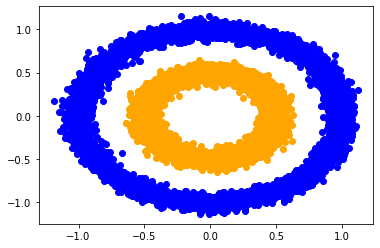

In [3]:
show_synthetic_data(dataset.points, dataset.labels)

Erläutern Sie, was in der Standard Einstellung mit dem letzten Batch des Datensatz passiert.

*Wenn am Ende nicht mehr genug Daten vorhanden sind, um ein Batch mit z.B. 64 Elementen zu füllen, dann wird dieses Batch mit den verbleibenden Elementen gefüllt. Hier sind dies 16.*

## b) Grundlagen MLP und Aktivierungsfunktionen

Vervollständigen Sie die Klasse ``BinaryClassifierMLP``, sodass sie ein MLP implementiert, das einen Vektor mit Dimension ``n_inputs`` auf einen Skalar abbildet.

*siehe handout.py*

Vervollständigen Sie die Funktion train, so dass das Neuronale Netzwerk model mit
Hilfe des Optimizers ``optim`` für epochs Epochen auf dem Datensatz des DataLoader
``dataloader`` trainiert wird den ``torch.nn.BCELoss()`` zu minimieren. Zusätzliche soll die
Funktion eine Liste der Fehlerwerte, die während des Trainings berechnet wurden,
zurückgeben.

*siehe handout.py*

Vervollständigen Sie die Funktion ``evaluate`` so dass Sie die Genauigkeit des Neuronalen
Netzwerks model auf dem Datensatz des DataLoader ``dataloader`` berechnet.

*siehe handout.py*

Erstellen Sie je eine Instanz Ihres MLPs mit 2 verborgenen Schichten mit je 4 Neuronen,
die jede eine der oben gelisteten Aktivierungsfunktionen in den verborgenen Schichten
verwendet. Trainieren Sie die MLPs auf dem Datensatz CirclesDataset, geben Sie
die Genauigkeit nach dem Training an.

In [4]:
model = BinaryClassifierMLP(2, [4, 4], torch.nn.ReLU)
optimizer = torch.optim.Adam(model.parameters())

loss_history = train_binary(
    model=model,
    dataloader=dataloader,
    epochs=50,
    optim=optimizer,
)

accuracy = evaluate(dataloader=dataloader, model=model)

print("Accuracy:", round(accuracy, 2))


Epoch 1/50: loss = 0.695336639881134
Epoch 5/50: loss = 0.59590083360672
Epoch 10/50: loss = 0.059072356671094894
Epoch 15/50: loss = 0.012255239300429821
Epoch 20/50: loss = 0.005838864017277956
Epoch 25/50: loss = 0.0034656054340302944
Epoch 30/50: loss = 0.0021550951059907675
Epoch 35/50: loss = 0.0013726516626775265
Epoch 40/50: loss = 0.0008585486793890595
Epoch 45/50: loss = 0.0005407185526564717
Epoch 50/50: loss = 0.00033396147773601115
Finished Training
Accuracy: 100.0


Plotten Sie die Fehlerkurve und visualisieren Sie
die Entscheidungsgrenzen der MLPs.

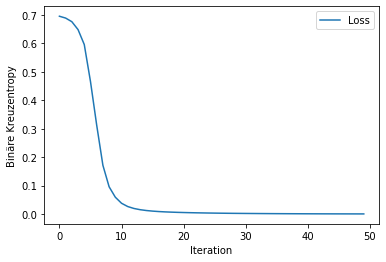

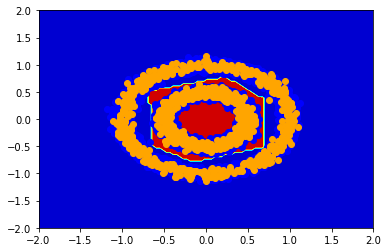

In [5]:
show_loss_curve(loss_history)
show_decision_boundary(model, dataset.points, dataset.labels)

Beschreiben Sie welche Unterschiede Ihnen zwischen den MLPs mit unterschiedlichen Aktivierungsfunktionen auffallen und begründen
Sie wie diese Unterschiede zustande kommen.

>>>>>> Testing for Identity <<<<<<
Finished Training


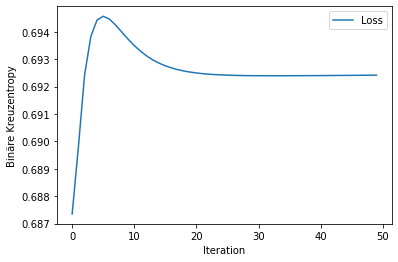

Accuracy: 50.0 

>>>>>> Testing for Tanh <<<<<<
Finished Training


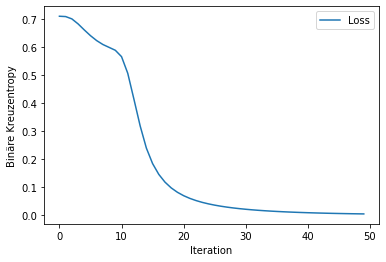

Accuracy: 100.0 

>>>>>> Testing for Sigmoid <<<<<<
Finished Training


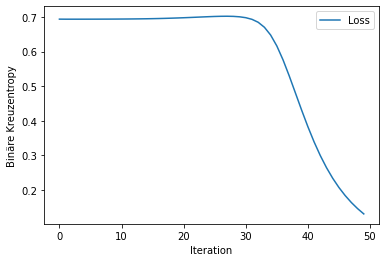

Accuracy: 99.95 

>>>>>> Testing for GELU <<<<<<
Finished Training


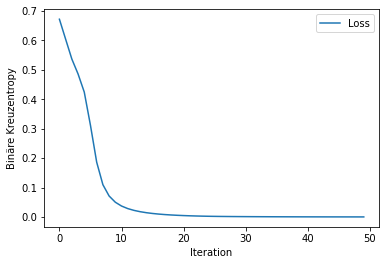

Accuracy: 100.0 

>>>>>> Testing for LeakyReLU <<<<<<
Finished Training


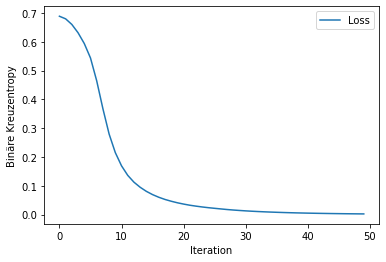

Accuracy: 100.0 



In [6]:
activation_functions = [
    torch.nn.Identity,
    torch.nn.Tanh,
    torch.nn.Sigmoid,
    torch.nn.GELU,
    torch.nn.LeakyReLU,
]

for activation_func in activation_functions:
    print(f">>>>>> Testing for {activation_func.__name__} <<<<<<")

    model = BinaryClassifierMLP(2, [4, 4], activation_func)
    optimizer = torch.optim.Adam(model.parameters())

    loss_history = train_binary(
        model=model, dataloader=dataloader, epochs=50, optim=optimizer, verbose=False
    )

    accuracy = evaluate(dataloader=dataloader, model=model)
    show_loss_curve(loss_history)

    print("Accuracy:", round(accuracy, 2), "\n")


*Wenn wir uns die verschiedenen Loss Graphen der Aktivierungsfunktionen anschauen, dann fällt auf, dass die ReLU-artigen Funktionen deutlich schneller zum Ziel kommen und auch nicht so stark vom Datenset abhängen. Dies merkt man, wenn man das Notebook öfters ausführt und immer neue Datensets generiert. Die Identity-Funktion schneidet mit Abstand am schlechtesten ab, bei Tanh und Sigmoid kommt es wie gesagt auf die Daten an.*